In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'

In [2]:
ϵ_default = 0.04  # default approximation of RAV error

def std_f_rav(K, N, λ, ϵ=ϵ_default):
    variance = (1/K) * (N / (N*(1-ϵ)-1))**2 * ((1-λ)*(1-ϵ) + λ/N) * (1 - (1-λ)*(1-ϵ) - λ/N)
    return np.sqrt(variance)

def std_f_xeb(K, N, λ, p2_sum=None, p3_sum=None, p4_sum=None):
    if p2_sum is None:
        p2_sum = 1/2
    if p3_sum is None:
        p3_sum = 1/3
    if p4_sum is None:
        p4_sum = 1/4
    variance = (1/K) * (N/(p2_sum*N-1))**2 * (p2_sum*(λ/N - (λ/N)**2) + p3_sum*(1-λ)*(1-2*λ/N) - p4_sum*(1-λ)**2)
    return np.sqrt(variance)

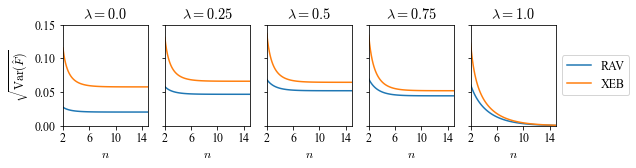

In [3]:
λ = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
n_qubits_list = np.linspace(2, 15, num=100)
K = 100

fig, ax = plt.subplots(1,len(λ),figsize=(9, 2.5))

for i, λ_curr in enumerate(λ):
    N = 2**np.array(n_qubits_list)
    relative_std_rav = std_f_rav(K, N, λ_curr)
    relative_std_xeb = std_f_xeb(K, N, λ_curr)

    ax[i].plot(n_qubits_list, relative_std_rav, '-', label='RAV')
    ax[i].plot(n_qubits_list, relative_std_xeb, '-', label='XEB')

    ax[i].set_xlabel(r'$n$')
    if i==0:
        ax[i].set_ylabel(r'$\sqrt{{\rm Var}(\hat{F})}$')
    else:
        ax[i].set_yticklabels([])
    ax[i].set_xlim(2, 15)
    ax[i].set_xticks([2,6,10,14])
    ax[i].set_ylim(0, 0.15)
    ax[i].set_title(fr'$\lambda = {λ_curr}$')

    if i==len(λ)-1:
        ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('fig3.pdf', bbox_inches='tight')

plt.show()